# Fake Users and Mentions  Word Clouds

We've used the following packages:

In [1]:
import pandas as pd
import numpy as np
import json
import itertools  
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import altair as alt
from matplotlib.colors import ListedColormap

To read the JSON file that has all the tweets, it is necessary to do:

In [2]:
data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))


### Users

We have filtered all the users and then we have calculated the frequency distribution

In [3]:
index_users=0
cmt_list_users = []
for element in data:
    token_users=data[index_users]['user']['screen_name']
    cmt_list_users.append(token_users)
    index_users=index_users+1
    
fdist_users = dict(nltk.FreqDist(cmt_list_users))

The users word cloud is created:

In [11]:
mask = np.array(Image.open('grafici/circle.jpg'))
a = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311','#EE3377', '#BBBBBB']
my_cmapu = ListedColormap(a)

wordcloud = WordCloud(background_color ='white', 
                font_path = 'grafici/GothamMedium.ttf',
                mask=mask,
                width=mask.shape[1],
                height=mask.shape[0],
                min_word_length = 3,
                max_words=400,
               min_font_size = 10,
                colormap=my_cmapu).generate_from_frequencies(fdist_users)

Plot the users word cloud:

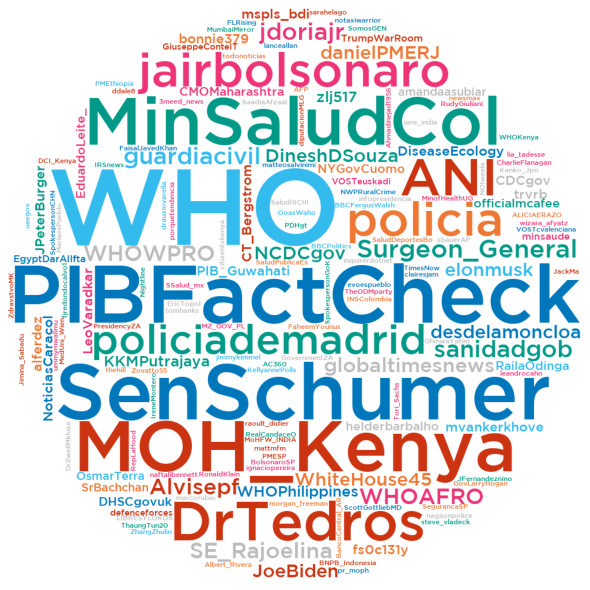

In [12]:
# Plot the Word Cloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

### Mentions

We have also filtered all the mentions and then we have calculated the frequency distribution,

In [6]:
index_mentions=0
cmt_list_mentions = []
for element in data:
    for entity in data[index_mentions]['entities']['user_mentions']:
        token_mentions=entity['screen_name']
        cmt_list_mentions.append(token_mentions)
    index_mentions=index_mentions+1
fdist_mentions = dict(nltk.FreqDist(cmt_list_mentions))

The mentions word cloud is created:

In [7]:
mask=np.array(Image.open('grafici/speech_bubble_8.jpg'))
a = ['#332288', '#117733', '#44AA99', '#88CCEE', '#DDCC77','#CC6677', '#AA4499', '#882255']
my_cmap = ListedColormap(a)

wordcloud = WordCloud(mask=mask,
            width=mask.shape[1],
            height=mask.shape[0],
               background_color ='white', 
                min_word_length = 3,
                max_words=300,
                font_path = 'grafici/GothamMedium.ttf',
               min_font_size = 10,
                colormap=my_cmap).generate_from_frequencies(fdist_mentions) 

Plot the mentions word cloud:

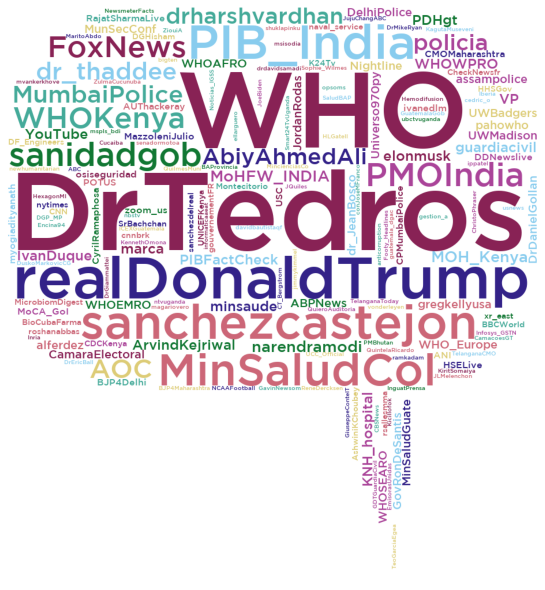

In [8]:
# Plot the Word Cloud image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()